In [6]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import style
%matplotlib widget
style.use('default')

In [2]:
#Calculate Hessian Matrix
def function_z(X,Y):
    return X * torch.e**(-(X**2)-(Y**2))

def deriv_x(X, Y):
    return (1 - 2 * X**2) * torch.e ** (-(X**2)-(Y**2))

def deriv_y(X, Y):
    return -2 * X * Y * torch.e ** (-(X**2)-(Y**2))

def second_deriv_x(X,Y):
    return 2 * X * ((2 * X**2) - 3 ) * torch.e**(-(X**2)-(Y**2))

def second_deriv_y(X,Y):
    return 2 * X * ((2 * Y**2) - 1 ) * torch.e**(-(X**2)-(Y**2))

def second_deriv_xy(X,Y):
    return 2 * ((2 * X**2) -1 ) * Y * torch.e**(-(X**2)-(Y**2))

def hessian_matrix(X,Y):
    return torch.tensor([[second_deriv_x(X,Y),second_deriv_xy(X,Y)],[second_deriv_xy(X,Y),second_deriv_y(X,Y)]])

#Newton Rhapson
def newton_rhapson(initial_pos,epochs):
    #Starting position taken from parameters
    position=initial_pos
    x_t=[position]

    
    for i in range(epochs):
        gradient= torch.Tensor([deriv_x(position[0],position[1]),deriv_y(position[0],position[1])])
        print("Gradient", i ,gradient)

        H=hessian_matrix(position[0],position[1])
        print("Hessian", i, H)
        
        if torch.det(H)==0:
            break
        print("Inverse Hessian",i,(H.inverse()))
        print("Hess Ricardo",torch.nan_to_num(torch.inverse(H)))

        delta=-1 * torch.matmul(H.inverse(),gradient)
        #delta=torch.matmul(-1 * torch.nan_to_num(torch.inverse(H)),gradient)
        
        print("Delta", i,  delta)

        position = function_z(position[0],position[1]) + delta
        print("New Position", i ,position)

        x_t.append(position)
        print("Total Pos", i ,x_t)

        print("******************New loop******************")
    
    
    return x_t


In [3]:
#Starts plot
def plot(points_x,points_y,points_z):

    %matplotlib widget


    #Starts plot
    N=256
    arrange=[-2,2]

    x_values=torch.linspace(arrange[0],arrange[1],steps=N)
    y_values=torch.linspace(arrange[0],arrange[1],steps=N)

    X, Y = torch.meshgrid(x_values,y_values)
    Z = function_z(X,Y)

    plt.rcParams["figure.figsize"] = [7, 7]
    plt.rcParams["figure.autolayout"] = True

    ax = plt.axes(projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Graph')

    ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=10,antialiased=True,alpha=0.5)
    ax.plot(points_x, points_y, points_z, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="yellow")

    #Contour plot
    fig2,ax2=plt.subplots(1,1)
    cp=ax2.contourf(X,Y,Z,cmap=cm.coolwarm)
    #cp=ax2.contourf(X,Y,Z)
    fig2.colorbar(cp)
    ax2.set_title('Contour Plot')
    ax2.set_ylabel('y')

    ax2.plot(points_x, points_y, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="yellow")
    ax2.quiver(points_x[:-1], points_y[:-1], (points_x[1:]-points_x[:-1]), (points_y[1:]-points_y[:-1]))


Gradient 0 tensor([ 0.2053, -0.3285])
Hessian 0 tensor([[ 1.0266,  0.3285],
        [ 0.3285, -0.1150]])
Inverse Hessian 0 tensor([[ 0.5088,  1.4538],
        [ 1.4538, -4.5432]])
Hess Ricardo tensor([[ 0.5088,  1.4538],
        [ 1.4538, -4.5432]])
Delta 0 tensor([ 0.3731, -1.7910])
New Position 0 tensor([ 0.1678, -1.9964])
Total Pos 0 [tensor([-0.5000, -0.8000]), tensor([ 0.1678, -1.9964])]
******************New loop******************
Gradient 1 tensor([0.0170, 0.0121])
Hessian 1 tensor([[-0.0178,  0.0681],
        [ 0.0681,  0.0423]])
Inverse Hessian 1 tensor([[-7.8441, 12.6330],
        [12.6330,  3.3124]])
Hess Ricardo tensor([[-7.8441, 12.6330],
        [12.6330,  3.3124]])
Delta 1 tensor([-0.0192, -0.2555])
New Position 1 tensor([-0.0162, -0.2525])
Total Pos 1 [tensor([-0.5000, -0.8000]), tensor([ 0.1678, -1.9964]), tensor([-0.0162, -0.2525])]
******************New loop******************
Gradient 2 tensor([ 0.9375, -0.0077])
Hessian 2 tensor([[0.0909, 0.4734],
        [0.4734, 0

c:\python38\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:140: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
c:\python38\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


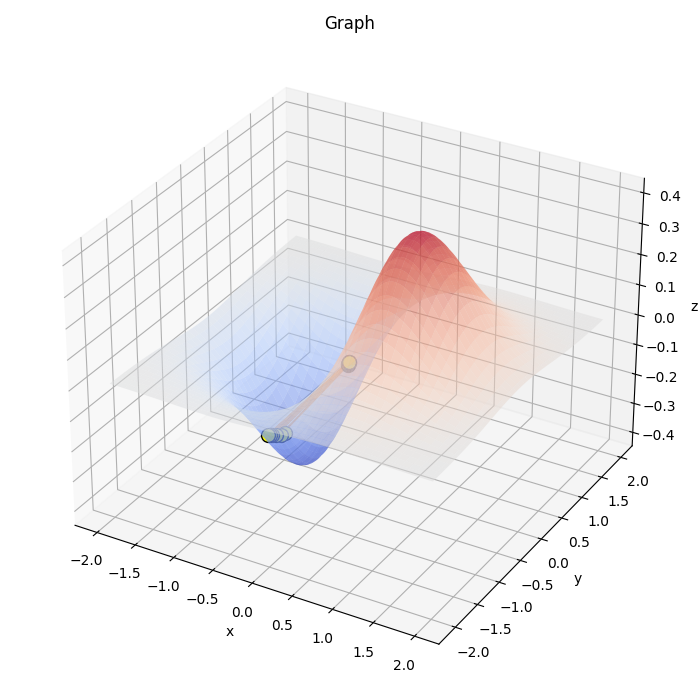

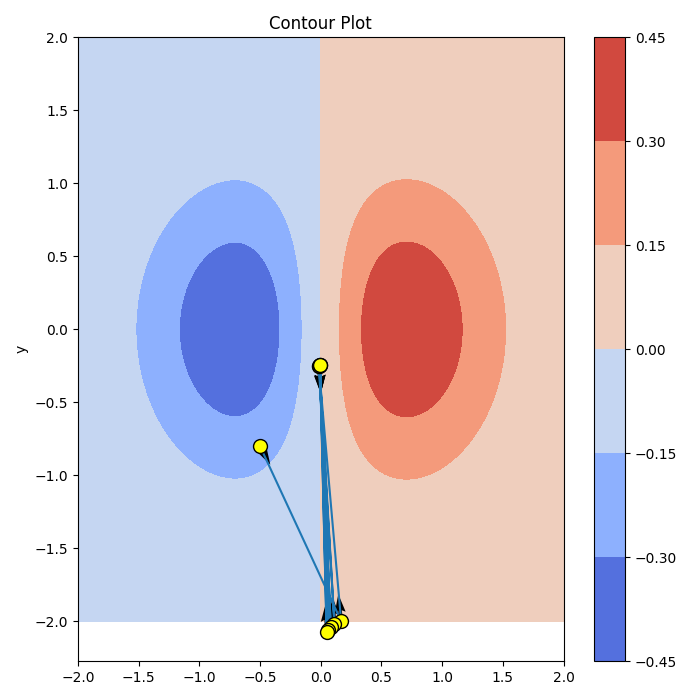

In [7]:
epochs=10

#initial_pos=torch.Tensor([0.5, -0.23])
#initial_pos=torch.Tensor([1.0,0.0])
#initial_pos=torch.Tensor([0.7,0.6])
#initial_pos=torch.Tensor([0.4,-0.3])
#ejemplo más aceptable.
initial_pos=torch.Tensor([-0.5, -0.8])
points=newton_rhapson(initial_pos,epochs)
print("Points",points)

#Test punto
points=torch.stack(points)
points_x=points[:,0]
points_y=points[:,1]
points_z=function_z(points_x,points_y)


#Plot
plot(points_x,points_y,points_z)